# Assignment 2: Data Exploration

**Anny Rodriguez Viloria  -  UP206A - Fall 2020**

For this assignment I downloaded a subset from the 2015 World Development Indicators from Social Explorer. I am going to focus on creatingc tables and figures an basic demographic indicators. My research question needs some cleaning up and focus and cheking the availability of data is a good place to start narrowing down my focus.

In [18]:
#first, i am importing the pandas library
import pandas as pd 
import geopandas as gpd

In [6]:
#and next i am importing the data file i already downloaded and saved to the same folder this notebook is in
df = pd.read_csv('WorldDevInd2015.csv')

In [19]:
type(df)

pandas.core.frame.DataFrame

It doesn't look like this dataframe is geocoded so I'll need to merge this file with the one I used in my homework 1.

## Data Inspection

In [ ]:
# first i want to know how large my dataset is:
df.shape

In [7]:
# and also what my data looks like:
df.head(10)

,Geo_FIPS,Geo_NAME,Geo_QNAME,Geo_INCCOUNTRY,SE_T001_001,SE_T150_001,SE_T150_003,SE_T150_002,PCT_SE_T150_003,PCT_SE_T150_002,...,PCT_SE_T004_002,PCT_SE_T004_003,SE_T057_001,SE_T057_002,SE_T057_003,SE_T015_001,SE_T015_002,SE_T015_009,SE_T211_001,SE_T211_002
0,LICAFG,Afghanistan,"Afghanistan, Low-income economies",AFG,32526562.0,32526562.0,1.677370e+07,1.575286e+07,51.57,48.43,...,26.70,73.30,36242.0,67399.0,94261.0,35.5,66.3,91.1,4300.0,396.0
1,LICBDI,Burundi,"Burundi, Low-income economies",BDI,11178921.0,11178921.0,5.524232e+06,5.654689e+06,49.42,50.58,...,12.06,87.94,13236.0,24956.0,36970.0,28.6,54.1,81.7,3500.0,712.0
2,LICBEN,Benin,"Benin, Low-income economies",BEN,10879829.0,10879829.0,5.425949e+06,5.453880e+06,49.87,50.13,...,43.95,56.05,11955.0,24069.0,37092.0,31.8,64.2,99.5,1600.0,405.0
3,LICBFA,Burkina Faso,"Burkina Faso, Low-income economies",BFA,18105570.0,18105570.0,8.984175e+06,9.121395e+06,49.62,50.38,...,29.86,70.14,18346.0,41810.0,60477.0,26.7,60.9,88.6,2700.0,371.0
4,LICCAF,Central African Republic,"Central African Republic, Low-income economies",CAF,4900274.0,4900274.0,2.415418e+06,2.484856e+06,49.29,50.71,...,40.04,59.96,6993.0,14981.0,21029.0,42.6,91.5,130.1,1400.0,882.0
5,LICCOD,"Congo, DRC","Congo, DRC, Low-income economies",COD,77266814.0,77266814.0,3.853313e+07,3.873368e+07,49.87,50.13,...,42.49,57.51,94252.0,233339.0,304558.0,30.1,74.5,98.3,22000.0,693.0
6,LICCOM,Comoros,"Comoros, Low-income economies",COM,788474.0,788474.0,3.977000e+05,3.907740e+05,50.44,49.56,...,28.30,71.70,889.0,1433.0,1897.0,34.0,55.1,73.5,88.0,335.0
7,LICERI,Eritrea,"Eritrea, Low-income economies",ERI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3056.0,5652.0,7764.0,18.4,34.1,46.5,880.0,501.0
8,LICETH,Ethiopia,"Ethiopia, Low-income economies",ETH,99390750.0,99390750.0,4.960761e+07,4.978314e+07,49.91,50.09,...,19.47,80.53,87414.0,129947.0,184186.0,27.7,41.4,59.2,11000.0,353.0
9,LICGIN,Guinea,"Guinea, Low-income economies",GIN,12608590.0,12608590.0,6.322237e+06,6.286353e+06,50.14,49.86,...,37.16,62.84,14288.0,27757.0,42073.0,31.3,61.0,93.7,3100.0,679.0


In [8]:
df.tail()

,Geo_FIPS,Geo_NAME,Geo_QNAME,Geo_INCCOUNTRY,SE_T001_001,SE_T150_001,SE_T150_003,SE_T150_002,PCT_SE_T150_003,PCT_SE_T150_002,...,PCT_SE_T004_002,PCT_SE_T004_003,SE_T057_001,SE_T057_002,SE_T057_003,SE_T015_001,SE_T015_002,SE_T015_009,SE_T211_001,SE_T211_002
130,UMCTUN,Tunisia,"Tunisia, Upper-middle-income economies",TUN,11107800.00,11107800.00,5.489059e+06,5.618741e+06,49.42,50.58,...,66.84,33.16,1724.0,2546.0,2919.0,8.2,12.1,14.0,130.0,62.0
131,UMCTUR,Turkey,"Turkey, Upper-middle-income economies",TUR,78665830.00,78665830.00,3.867456e+07,3.999127e+07,49.16,50.84,...,73.40,26.60,9980.0,16325.0,18936.0,7.1,11.6,13.5,210.0,16.0
132,UMCTUV,Tuvalu,"Tuvalu, Upper-middle-income economies",TUV,9916.00,9916.00,NaN,NaN,NaN,NaN,...,59.72,40.28,4.0,5.0,6.0,17.6,22.8,27.1,NaN,NaN
133,UMCVCT,St. Vincent and the Grenadines,"St. Vincent and the Grenadines, Upper-middle-i...",VCT,109462.00,109462.00,5.523200e+04,5.423000e+04,50.46,49.54,...,50.55,49.45,19.0,27.0,30.0,11.5,16.6,18.3,1.0,45.0
134,UMCZAF,South Africa,"South Africa, Upper-middle-income economies",ZAF,54956920.37,54956920.37,2.702668e+07,2.793024e+07,49.18,50.82,...,64.80,35.20,11141.0,34078.0,41930.0,11.0,33.6,40.5,1500.0,138.0


In [9]:
# to get a sense of the column names, data types, and missing values:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Geo_FIPS         135 non-null    object 
 1   Geo_NAME         135 non-null    object 
 2   Geo_QNAME        135 non-null    object 
 3   Geo_INCCOUNTRY   135 non-null    object 
 4   SE_T001_001      134 non-null    float64
 5   SE_T150_001      134 non-null    float64
 6   SE_T150_003      129 non-null    float64
 7   SE_T150_002      129 non-null    float64
 8   PCT_SE_T150_003  129 non-null    float64
 9   PCT_SE_T150_002  129 non-null    float64
 10  SE_T151_001      134 non-null    float64
 11  SE_T151_002      129 non-null    float64
 12  SE_T151_003      129 non-null    float64
 13  SE_T151_004      129 non-null    float64
 14  PCT_SE_T151_002  129 non-null    float64
 15  PCT_SE_T151_003  129 non-null    float64
 16  PCT_SE_T151_004  129 non-null    float64
 17  SE_T004_001     

A first look tells me there are not many missing values, but just to make sure:

In [10]:
df.columns[df.isna().all()].tolist()

[]

No empty columns! I'll still need to rename the columns to make it easier to manipulate. The Geo_FIPS codes were imported as objects so I'll assume I do not need to change type manually.

## Data Cleaning

From looking at the codebook, I know there are several columns I can delete so I'll start there:

In [11]:
columns_to_drop = ['Geo_INCCOUNTRY','SE_T150_001','SE_T150_002','SE_T150_003','SE_T151_001','SE_T151_002','SE_T151_003','SE_T151_004','SE_T004_001','SE_T004_002','SE_T004_003','SE_T057_001','SE_T057_002','SE_T057_003','SE_T211_001']
df = df.drop(columns_to_drop,axis=1)

In [12]:
#and to confirm it worked:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Geo_FIPS         135 non-null    object 
 1   Geo_NAME         135 non-null    object 
 2   Geo_QNAME        135 non-null    object 
 3   SE_T001_001      134 non-null    float64
 4   PCT_SE_T150_003  129 non-null    float64
 5   PCT_SE_T150_002  129 non-null    float64
 6   PCT_SE_T151_002  129 non-null    float64
 7   PCT_SE_T151_003  129 non-null    float64
 8   PCT_SE_T151_004  129 non-null    float64
 9   PCT_SE_T004_002  133 non-null    float64
 10  PCT_SE_T004_003  133 non-null    float64
 11  SE_T015_001      133 non-null    float64
 12  SE_T015_002      133 non-null    float64
 13  SE_T015_009      133 non-null    float64
 14  SE_T211_002      129 non-null    float64
dtypes: float64(12), object(3)
memory usage: 15.9+ KB


We now have 15 instead of the original 30. The next step will be to rename them.

In [13]:
df.columns.to_list()

['Geo_FIPS',
 'Geo_NAME',
 'Geo_QNAME',
 'SE_T001_001',
 'PCT_SE_T150_003',
 'PCT_SE_T150_002',
 'PCT_SE_T151_002',
 'PCT_SE_T151_003',
 'PCT_SE_T151_004',
 'PCT_SE_T004_002',
 'PCT_SE_T004_003',
 'SE_T015_001',
 'SE_T015_002',
 'SE_T015_009',
 'SE_T211_002']

In [21]:
df.columns = ['FIPS',
 'GEO_country',
 'Geo_QNAME',
 'TotalPop',
 'Male_PCT',
 'Female_PCT',
 'Pop_u14_PCT',
 'Pop_1564_PCT',
 'Pop_65up_PCT',
 'Rural_PCT',
 'Urban_PCT',
 'NeonatalMortRate_p1k',
 'InfantMortRate_p1k',
 'U5MortRate_p1k',              
 'MaternalMortRate_p100k']

In [22]:
df.sample()

,FIPS,GEO_country,Geo_QNAME,TotalPop,Male_PCT,Female_PCT,Pop_u14_PCT,Pop_1564_PCT,Pop_65up_PCT,Rural_PCT,Urban_PCT,NeonatalMortRate_p1k,InfantMortRate_p1k,U5MortRate_p1k,MaternalMortRate_p100k
38,LMCCPV,Cabo Verde,"Cabo Verde, Lower-middle-income economies",520502.0,49.34,50.66,29.65,65.77,4.58,65.53,34.47,12.2,20.7,24.5,42.0


In [23]:
#now to check where the missing values are:
df.isna().sum()

FIPS                      0
GEO_country               0
Geo_QNAME                 0
TotalPop                  1
Male_PCT                  6
Female_PCT                6
Pop_u14_PCT               6
Pop_1564_PCT              6
Pop_65up_PCT              6
Rural_PCT                 2
Urban_PCT                 2
NeonatalMortRate_p1k      2
InfantMortRate_p1k        2
U5MortRate_p1k            2
MaternalMortRate_p100k    6
dtype: int64

I will probably not use the countries with missing data in my analysis but I don't need to drop them so I am done cleaning for now.

## Stats and Plots

My goal is to sort my data by each of the four health indicators in my dataset: neonatal mortality rate, infant mortality rate, under 5 mortality rate, and maternal mortality rate. I will generate a plot for the top 10 countries leading these four indicators to visualize any potential overlap in these countries. I am also going to plot the countries with the lowest mortality rates, just to see what the patterns are.

In [37]:
# first, sort by 10 highest neonatal mortality rates
df_neonatal = df.sort_values(by='NeonatalMortRate_p1k',ascending=False)
df_neonatal[['GEO_country','TotalPop','NeonatalMortRate_p1k']].head(10)

,GEO_country,TotalPop,NeonatalMortRate_p1k
82,Angola,25021974.0,48.7
61,Pakistan,188924874.0,45.5
4,Central African Republic,4900274.0,42.6
24,Somalia,10787104.0,39.7
11,Guinea-Bissau,1844325.0,39.7
26,Chad,14037472.0,39.3
25,South Sudan,12339812.0,39.3
35,Cote d'Ivoire,22701556.0,37.9
16,Mali,17599694.0,37.8
58,Mauritania,4067564.0,35.7


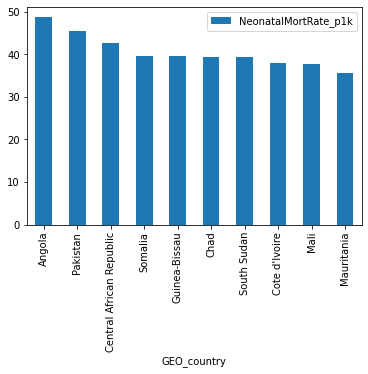

In [25]:
# plot neonatal mortality
df_neonatal.head(10).plot(x='GEO_country',
               y='NeonatalMortRate_p1k', 
               kind='bar')

In [38]:
# next, sort by 10 highest infant mortality rates
df_infant = df.sort_values(by='InfantMortRate_p1k',ascending=False)
df_infant[['GEO_country','TotalPop','InfantMortRate_p1k']].head(10)

,GEO_country,TotalPop,InfantMortRate_p1k
82,Angola,25021974.0,96.0
4,Central African Republic,4900274.0,91.5
23,Sierra Leone,6453184.0,87.1
24,Somalia,10787104.0,85.0
26,Chad,14037472.0,85.0
16,Mali,17599694.0,74.5
5,"Congo, DRC",77266814.0,74.5
59,Nigeria,182201962.0,69.4
54,Lesotho,2135022.0,69.2
35,Cote d'Ivoire,22701556.0,66.6


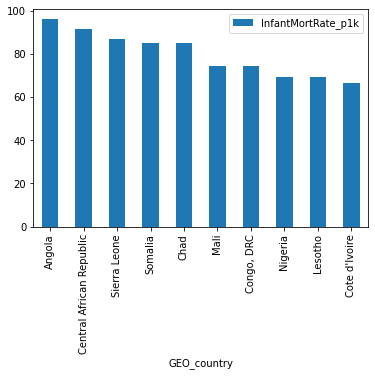

In [27]:
# plot infant mortality
df_infant.head(10).plot(x='GEO_country',
               y='InfantMortRate_p1k', 
               kind='bar')

In [39]:
# now sort by 10 highest under-5 mortality rate
df_u5 = df.sort_values(by='U5MortRate_p1k',ascending=False)
df_u5[['GEO_country','TotalPop','U5MortRate_p1k']].head(10)

,GEO_country,TotalPop,U5MortRate_p1k
82,Angola,25021974.0,156.9
26,Chad,14037472.0,138.7
24,Somalia,10787104.0,136.8
4,Central African Republic,4900274.0,130.1
23,Sierra Leone,6453184.0,120.4
16,Mali,17599694.0,114.7
59,Nigeria,182201962.0,108.8
2,Benin,10879829.0,99.5
5,"Congo, DRC",77266814.0,98.3
19,Niger,19899120.0,95.5


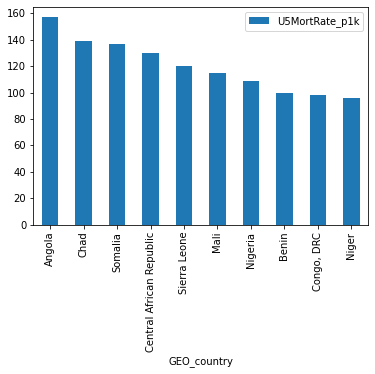

In [29]:
# plot under-5 mortality
df_u5.head(10).plot(x='GEO_country',
               y='U5MortRate_p1k', 
               kind='bar')

In [40]:
# lastly, sort by 10 highest maternal mortality rate
df_maternal = df.sort_values(by='MaternalMortRate_p100k',ascending=False)
df_maternal[['GEO_country','TotalPop','MaternalMortRate_p100k']].head(10)

,GEO_country,TotalPop,MaternalMortRate_p100k
23,Sierra Leone,6453184.0,1360.0
4,Central African Republic,4900274.0,882.0
26,Chad,14037472.0,856.0
59,Nigeria,182201962.0,814.0
25,South Sudan,12339812.0,789.0
24,Somalia,10787104.0,732.0
14,Liberia,4503438.0,725.0
1,Burundi,11178921.0,712.0
10,The Gambia,1990924.0,706.0
5,"Congo, DRC",77266814.0,693.0


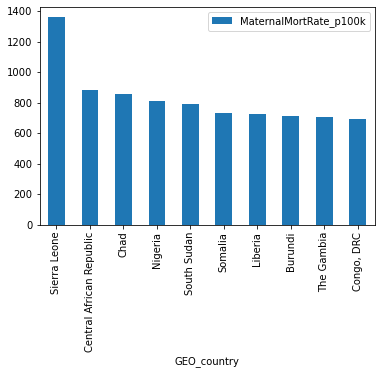

In [34]:
# plot maternal mortality
df_maternal.head(10).plot(x='GEO_country',
                          y='MaternalMortRate_p100k',
                          kind='bar')

One thing that I haven't been able to do but I think would make these visualizations much easier to compare to each other would be to assign a color to each country to track how these bars "move" in the ranking between charts.

Now I'd like to sort and plot countries by % of rural population to see if this ranking overlaps with the health indicators above.

In [43]:
df_rural = df.sort_values(by='Rural_PCT',ascending=False)
df_rural[['GEO_country','TotalPop','Rural_PCT']].head(10)

,GEO_country,TotalPop,Rural_PCT
108,Lebanon,5850743.0,87.79
84,American Samoa,55538.0,87.20
101,Gabon,1725292.0,87.16
122,Palau,21291.0,87.07
90,Brazil,207847528.0,85.69
106,Jordan,7594547.0,83.68
112,Mexico,127017224.0,79.25
97,Dominican Republic,10528391.0,78.98
121,Peru,31376670.0,78.61
109,Libya,6278438.0,78.55


I was expecting to see more overlap between the four mortality rate plots and the above list of the top ten countries with the highest percentage of rural population. I want to further visualize this relationship (or therelackof) with scatter plots.

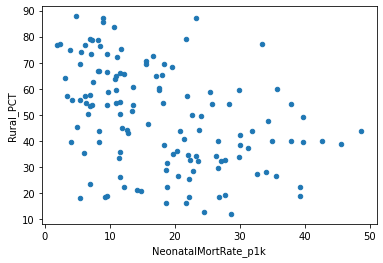

In [44]:
df_rural.plot(x ='NeonatalMortRate_p1k', y='Rural_PCT', kind = 'scatter')

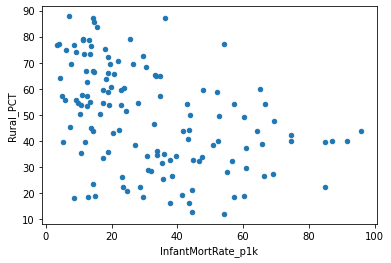

In [45]:
df_rural.plot(x ='InfantMortRate_p1k', y='Rural_PCT', kind = 'scatter')

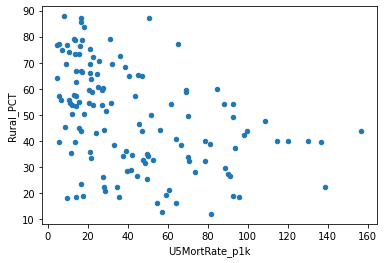

In [46]:
df_rural.plot(x ='U5MortRate_p1k', y='Rural_PCT', kind = 'scatter')

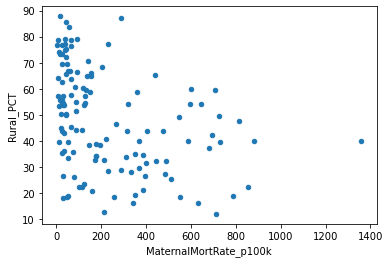

In [54]:
df_rural.plot(x ='MaternalMortRate_p100k', y='Rural_PCT', kind = 'scatter')

The scatter plots don't seem to support the hypothesis that higher rural population size is associated with higher rates of preventable mortality (neonatal, infant, under-5 and maternal). With this in mind, I want to bring in a second dataset that has additional country-level indicators for further comparisons. This dataframe also has age data but I don't think I need to use it at the moment.

## Maps

This is where I ran into problems. Upon closer examination I realized that the FIPS column of this dataset and the dataset I used for my previous data exploration exercise do not match. The FIPS code of this dataset is a 6-letter code while the FIPS code from my previous homework dataset is a 2-letter string. I tried to see if there's any way to add a column to this dataset that matched the FIPS code of the other dataset but I wasn't able to figure it out. I read a bit about international FIPS codes and there are indeed a few types. I read the codebook for this dataset (available in this folder) and there is no indication about what 'version' of FIPS they are using. I don't want to discard this dataset so any thoughts of how to merge are welcomed! (I tried by country name but the other dataset has more than one row per column and the names are in all caps so it didn't actually read them as the same country name. Help!